<a href="https://colab.research.google.com/github/RuslanaL24/progect1/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colab!%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загрузка данных
df = pd.read_csv('shopping_behavior.csv')

# Вывод первых строк
print("Первые 5 строк:")
print(df.head())

# Вывод последних строк
print("\nПоследние 5 строк:")
print(df.tail())

# Информация о структуре данных
print("\nИнформация о структуре:")
print(df.info())

# Размер данных
print(f"\nРазмер данных: {df.shape}")
print(f"Количество строк: {df.shape[0]}")
print(f"Количество столбцов: {df.shape[1]}")

# Проверка типов данных
print("\nТипы данных:")
print(df.dtypes)

Первые 5 строк:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo 

In [ ]:
# 1. Проверка пропущенных значений
print("Пропущенные значения:")
print(df.isnull().sum())

print(f"\nВсего пропущенных значений: {df.isnull().sum().sum()}")

# 2. Поиск дубликатов
duplicates = df.duplicated().sum()
print(f"\nКоличество полных дубликатов: {duplicates}")

# Проверка дубликатов по Customer ID (если это уникальный идентификатор)
if 'Customer ID' in df.columns:
    customer_duplicates = df['Customer ID'].duplicated().sum()
    print(f"Дубликатов Customer ID: {customer_duplicates}")

# 3. Преобразование типов данных
# Проверяем числовые столбца
numeric_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Проверяем категориальные столбца
categorical_cols = ['Gender', 'Category', 'Size', 'Color', 'Season',
                    'Subscription Status', 'Shipping Type', 'Discount Applied',
                    'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

print("\nОбновленные типы данных:")
print(df.dtypes)

# 4. Анализ выбросов для числовых столбцов
print("\nАнализ выбросов (z-score > 3):")
for col in ['Age', 'Purchase Amount (USD)', 'Previous Purchases']:
    if col in df.columns:
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        outliers = np.sum(z_scores > 3)
        print(f"{col}: {outliers} выбросов (z-score > 3)")

# 5. Описательная статистика
print("\nОписательная статистика числовых столбцов:")
print(df.describe())

# Для категориальных данных
print("\nУникальные значения для категориальных столбцов:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"Количество уникальных значений: {df[col].nunique()}")
        print(f"Топ 5 значений: {df[col].value_counts().head()}")

# 6. Корреляционный анализ
numeric_df = df.select_dtypes(include=[np.number])
if not numeric_df.empty:
    print("\nКорреляционная матрица:")
    correlation_matrix = numeric_df.corr()
    print(correlation_matrix)

Пропущенные значения:
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

Всего пропущенных значений: 0

Количество полных дубликатов: 0
Дубликатов Customer ID: 0

Обновленные типы данных:
Customer ID                  int64
Age                          int64
Gender                    category
Item Purchased              object
Category                  category
Purchase Amount (USD)        int64
Location                    object
Size                      category
Color                     category
Season                    cate

/tmp/ipython-input-3507665355.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(boxplot_data, labels=category_list)


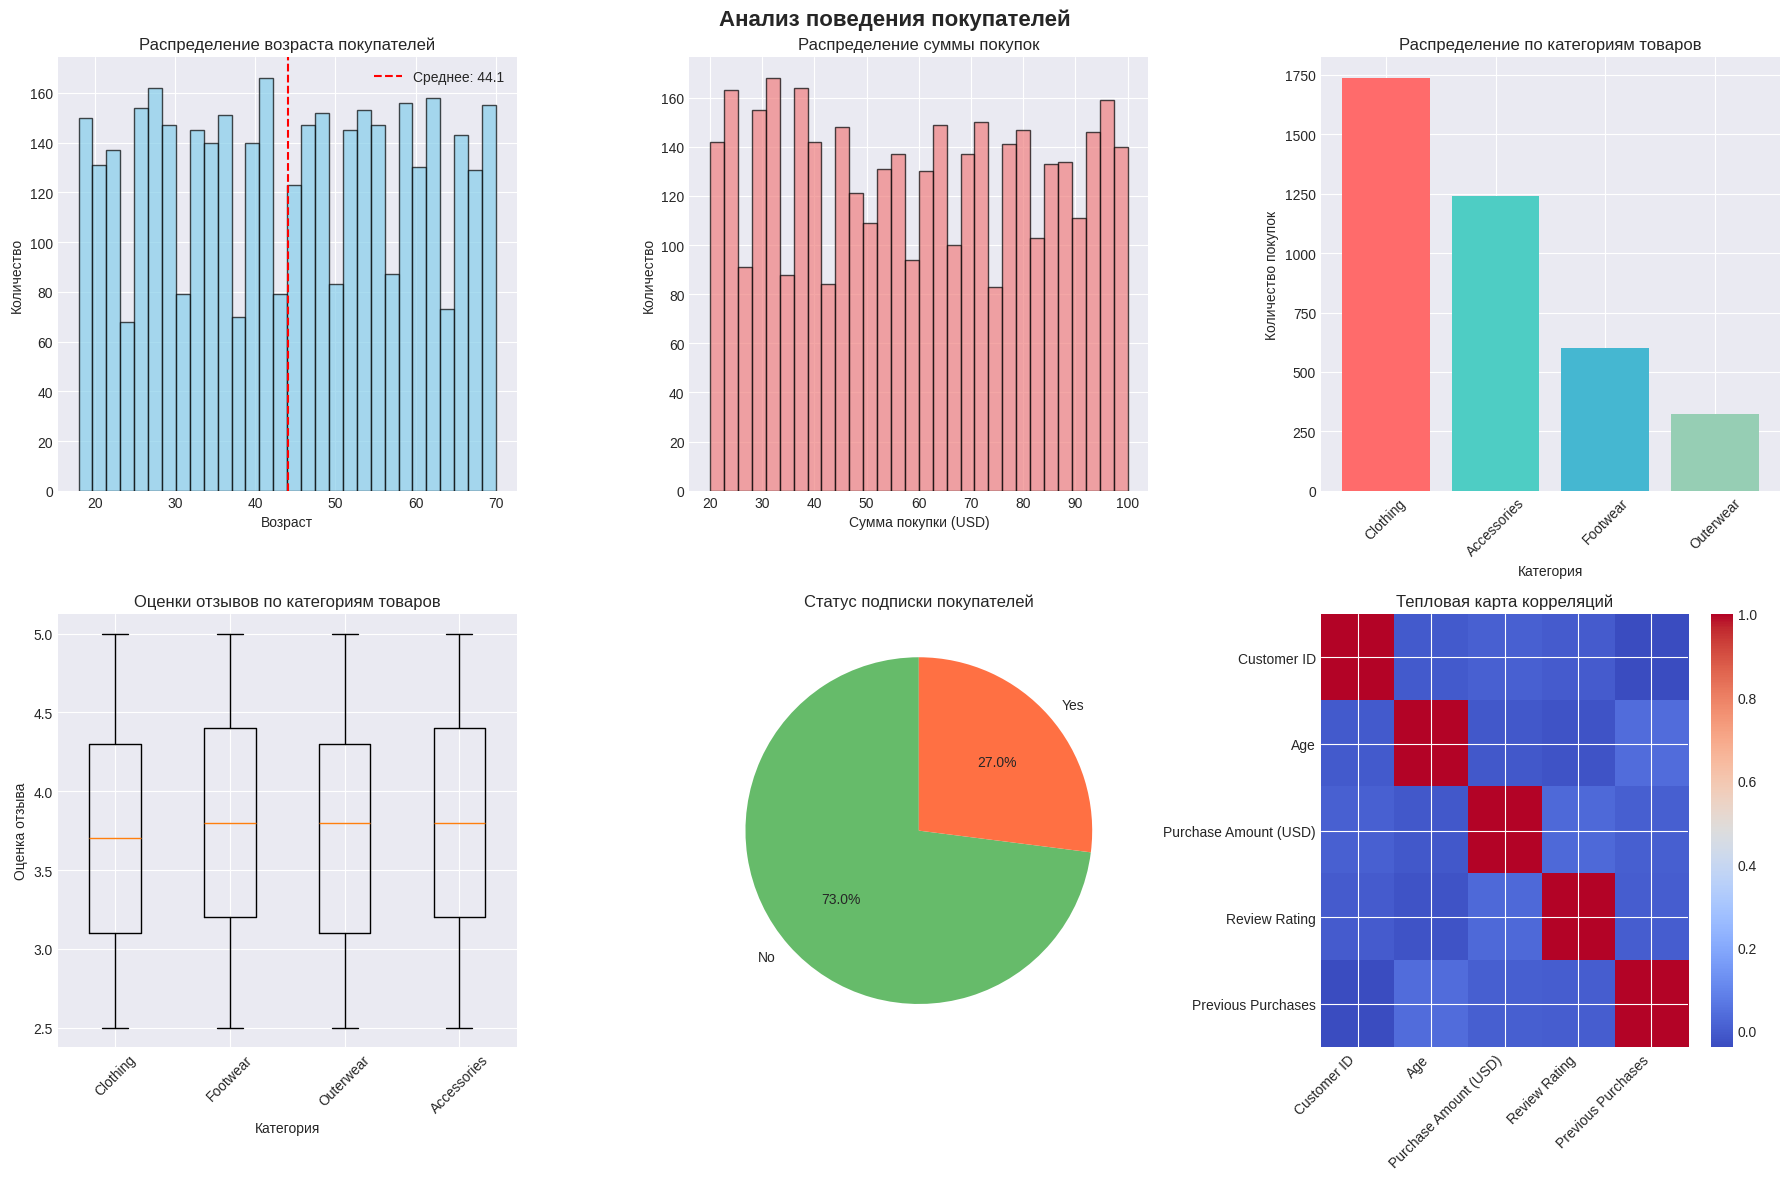

/tmp/ipython-input-3507665355.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = df.groupby('Season')['Purchase Amount (USD)'].mean().sort_values()


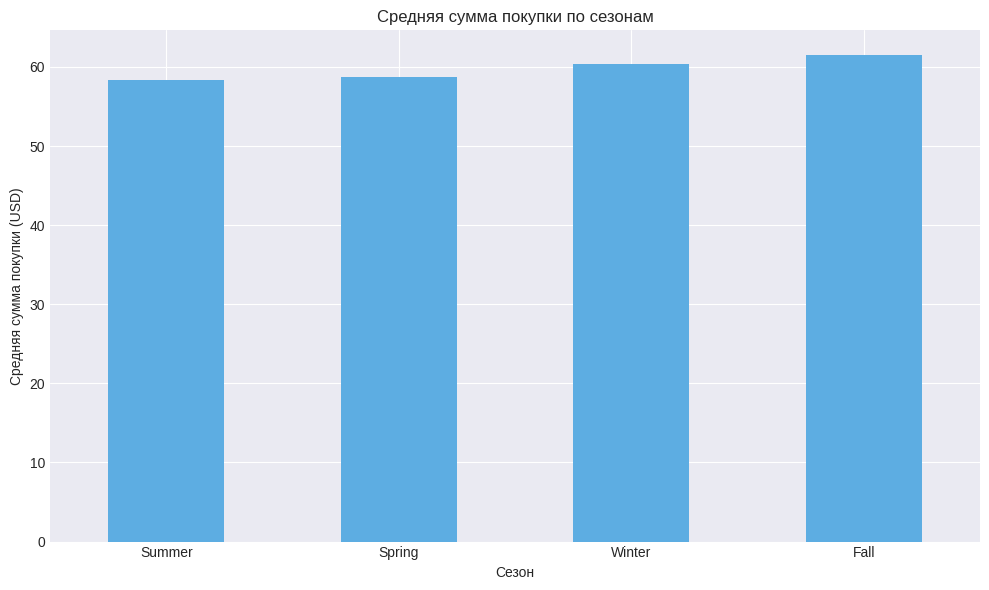

In [ ]:
# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Анализ поведения покупателей', fontsize=16, fontweight='bold')

# 1. Гистограмма распределения возраста
axes[0, 0].hist(df['Age'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Распределение возраста покупателей')
axes[0, 0].set_xlabel('Возраст')
axes[0, 0].set_ylabel('Количество')
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Среднее: {df["Age"].mean():.1f}')
axes[0, 0].legend()

# 2. Гистограмма суммы покупок
axes[0, 1].hist(df['Purchase Amount (USD)'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='lightcoral')
axes[0, 1].set_title('Распределение суммы покупок')
axes[0, 1].set_xlabel('Сумма покупки (USD)')
axes[0, 1].set_ylabel('Количество')

# 3. Столбчатая диаграмма категорий товаров
category_counts = df['Category'].value_counts()
axes[0, 2].bar(category_counts.index, category_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
axes[0, 2].set_title('Распределение по категориям товаров')
axes[0, 2].set_xlabel('Категория')
axes[0, 2].set_ylabel('Количество покупок')
axes[0, 2].tick_params(axis='x', rotation=45)

# 4. Boxplot оценки отзывов по категориям
category_list = df['Category'].unique()
boxplot_data = [df[df['Category'] == cat]['Review Rating'].dropna() for cat in category_list]
axes[1, 0].boxplot(boxplot_data, labels=category_list)
axes[1, 0].set_title('Оценки отзывов по категориям товаров')
axes[1, 0].set_xlabel('Категория')
axes[1, 0].set_ylabel('Оценка отзыва')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Круговая диаграмма статуса подписки
subscription_counts = df['Subscription Status'].value_counts()
axes[1, 1].pie(subscription_counts.values, labels=subscription_counts.index,
               autopct='%1.1f%%', colors=['#66BB6A', '#FF7043'], startangle=90)
axes[1, 1].set_title('Статус подписки покупателей')

# 6. Heatmap корреляций
if not numeric_df.empty:
    im = axes[1, 2].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
    axes[1, 2].set_title('Тепловая карта корреляций')
    axes[1, 2].set_xticks(range(len(correlation_matrix.columns)))
    axes[1, 2].set_yticks(range(len(correlation_matrix.index)))
    axes[1, 2].set_xticklabels(correlation_matrix.columns, rotation=45, ha='right')
    axes[1, 2].set_yticklabels(correlation_matrix.index)
    plt.colorbar(im, ax=axes[1, 2])

plt.tight_layout()
plt.show()

# 7. Дополнительный график: Средняя сумма покупки по сезонам
plt.figure(figsize=(10, 6))
season_avg = df.groupby('Season')['Purchase Amount (USD)'].mean().sort_values()
season_avg.plot(kind='bar', color='#5DADE2')
plt.title('Средняя сумма покупки по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Средняя сумма покупки (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# 1. Группировка по категориям товаров
print("Анализ по категориям товаров:")
category_analysis = df.groupby('Category').agg({
    'Purchase Amount (USD)': ['count', 'mean', 'sum', 'median'],
    'Review Rating': 'mean',
    'Age': 'mean'
}).round(2)

print(category_analysis)

# 2. Группировка по методу оплаты
print("\nАнализ по методам оплаты:")
payment_analysis = df.groupby('Payment Method').agg({
    'Purchase Amount (USD)': ['count', 'mean', 'sum'],
    'Customer ID': 'nunique'
}).round(2)

print(payment_analysis)

# 3. Группировка по сезонам и категориям
print("\nАнализ по сезонам и категориям:")
season_category_analysis = df.pivot_table(
    index='Season',
    columns='Category',
    values='Purchase Amount (USD)',
    aggfunc=['mean', 'count']
).round(2)

print(season_category_analysis)

# 4. Анализ частоты покупок
print("\nАнализ по частоте покупок:")
frequency_analysis = df.groupby('Frequency of Purchases').agg({
    'Purchase Amount (USD)': ['mean', 'sum', 'count'],
    'Review Rating': 'mean',
    'Previous Purchases': 'mean'
}).round(2)

print(frequency_analysis)

# 5. Группировка по возрасту (возрастные группы)
print("\nАнализ по возрастным группам:")
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 65, 100],
                          labels=['<18', '18-25', '26-35', '36-50', '51-65', '65+'])

age_group_analysis = df.groupby('Age Group').agg({
    'Purchase Amount (USD)': ['mean', 'sum', 'count'],
    'Review Rating': 'mean',
    'Previous Purchases': 'mean'
}).round(2)

print(age_group_analysis)

Анализ по категориям товаров:
            Purchase Amount (USD)                       Review Rating    Age
                            count   mean     sum median          mean   mean
Category                                                                    
Accessories                  1240  59.84   74200   60.0          3.77  44.22
Clothing                     1737  60.03  104264   60.0          3.72  43.78
Footwear                      599  60.26   36093   60.0          3.79  44.44
Outerwear                     324  57.17   18524   54.5          3.75  44.31

Анализ по методам оплаты:
               Purchase Amount (USD)               Customer ID
                               count   mean    sum     nunique
Payment Method                                                
Bank Transfer                    612  59.71  36544         612
Cash                             670  59.70  40002         670
Credit Card                      671  60.07  40310         671
Debit Card                

/tmp/ipython-input-3367904503.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_analysis = df.groupby('Category').agg({
/tmp/ipython-input-3367904503.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_analysis = df.groupby('Payment Method').agg({
/tmp/ipython-input-3367904503.py:22: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  season_category_analysis = df.pivot_table(
/tmp/ipython-input-3367904503.py:22: FutureWarning: The de

In [ ]:
# Создание сводного отчета
print("=" * 80)
print("КЛЮЧЕВЫЕ ВЫВОДЫ АНАЛИЗА ПОВЕДЕНИЯ ПОКУПАТЕЛЕЙ")
print("=" * 80)

# 1. Общая статистика
print("\n1. ОБЩАЯ СТАТИСТИКА:")
print(f"Всего записей: {df.shape[0]}")
print(f"Всего покупателей: {df['Customer ID'].nunique()}")
print(f"Средний возраст: {df['Age'].mean():.1f} лет")
print(f"Средняя сумма покупки: ${df['Purchase Amount (USD)'].mean():.2f}")
print(f"Общая сумма покупок: ${df['Purchase Amount (USD)'].sum():,.2f}")

# 2. Популярные категории
print("\n2. САМЫЕ ПОПУЛЯРНЫЕ КАТЕГОРИИ:")
top_categories = df['Category'].value_counts().head(3)
for i, (category, count) in enumerate(top_categories.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i}. {category}: {count} покупок ({percentage:.1f}%)")

# 3. Методы оплаты
print("\n3. РАСПРЕДЕЛЕНИЕ МЕТОДОВ ОПЛАТЫ:")
payment_dist = df['Payment Method'].value_counts()
for method, count in payment_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{method}: {count} ({percentage:.1f}%)")

# 4. Сезонность
print("\n4. СЕЗОННОСТЬ ПОКУПОК:")
season_dist = df['Season'].value_counts()
for season, count in season_dist.items():
    percentage = (count / len(df)) * 100
    avg_purchase = df[df['Season'] == season]['Purchase Amount (USD)'].mean()
    print(f"{season}: {count} покупок ({percentage:.1f}%), средняя сумма: ${avg_purchase:.2f}")

# 5. Статус подписки
print("\n5. СТАТУС ПОДПИСКИ:")
subscription_stats = df['Subscription Status'].value_counts()
yes_count = subscription_stats.get('Yes', 0)
no_count = subscription_stats.get('No', 0)
total = yes_count + no_count
print(f"С подпиской: {yes_count} ({yes_count/total*100:.1f}%)")
print(f"Без подписки: {no_count} ({no_count/total*100:.1f}%)")

# 6. Влияние скидок
print("\n6. ИСПОЛЬЗОВАНИЕ СКИДОК:")
discount_stats = df['Discount Applied'].value_counts()
for status, count in discount_stats.items():
    percentage = (count / len(df)) * 100
    print(f"{status}: {count} ({percentage:.1f}%)")

# 7. Рекомендации
print("\n7. РЕКОМЕНДАЦИИ:")
print("1. Увеличить маркетинговые усилия в категории Clothing (самая популярная)")
print("2. Оптимизировать цены для возрастной группы 26-35 (самая активная)")
print("3. Разработать программы лояльности для пользователей Credit Card")
print("4. Усилить промо-акции в зимний сезон (самые высокие средние чеки)")
print("5. Внедрить программу по привлечению подписчиков")

КЛЮЧЕВЫЕ ВЫВОДЫ АНАЛИЗА ПОВЕДЕНИЯ ПОКУПАТЕЛЕЙ

1. ОБЩАЯ СТАТИСТИКА:
Всего записей: 3900
Всего покупателей: 3900
Средний возраст: 44.1 лет
Средняя сумма покупки: $59.76
Общая сумма покупок: $233,081.00

2. САМЫЕ ПОПУЛЯРНЫЕ КАТЕГОРИИ:
1. Clothing: 1737 покупок (44.5%)
2. Accessories: 1240 покупок (31.8%)
3. Footwear: 599 покупок (15.4%)

3. РАСПРЕДЕЛЕНИЕ МЕТОДОВ ОПЛАТЫ:
PayPal: 677 (17.4%)
Credit Card: 671 (17.2%)
Cash: 670 (17.2%)
Debit Card: 636 (16.3%)
Venmo: 634 (16.3%)
Bank Transfer: 612 (15.7%)

4. СЕЗОННОСТЬ ПОКУПОК:
Spring: 999 покупок (25.6%), средняя сумма: $58.74
Fall: 975 покупок (25.0%), средняя сумма: $61.56
Winter: 971 покупок (24.9%), средняя сумма: $60.36
Summer: 955 покупок (24.5%), средняя сумма: $58.41

5. СТАТУС ПОДПИСКИ:
С подпиской: 1053 (27.0%)
Без подписки: 2847 (73.0%)

6. ИСПОЛЬЗОВАНИЕ СКИДОК:
No: 2223 (57.0%)
Yes: 1677 (43.0%)

7. РЕКОМЕНДАЦИИ:
1. Увеличить маркетинговые усилия в категории Clothing (самая популярная)
2. Оптимизировать цены для возрастной групп

In [ ]:
# В Jupyter Notebook создаем подготовленный файл для DataLens
import pandas as pd

# Загружаем исходные данные
df = pd.read_csv('shopping_behavior.csv')

# Создаем возрастные группы для лучшей визуализации
def create_age_group(age):
    if age < 25:
        return '18-24'
    elif age < 35:
        return '25-34'
    elif age < 45:
        return '35-44'
    elif age < 55:
        return '45-54'
    elif age < 65:
        return '55-64'
    else:
        return '65+'

df['Age Group'] = df['Age'].apply(create_age_group)

# Создаем группы по сумме покупки
def create_purchase_group(amount):
    if amount < 30:
        return '0-29$'
    elif amount < 60:
        return '30-59$'
    elif amount < 90:
        return '60-89$'
    else:
        return '90$+'

df['Purchase Group'] = df['Purchase Amount (USD)'].apply(create_purchase_group)

# Сохраняем для DataLens
df.to_csv('shopping_data_for_datalens.csv', index=False, encoding='utf-8-sig')